In [72]:
%matplotlib inline
import numpy as np
import pylab
import seaborn

In [120]:
def K1_roy_full(S, T):
    """Full expression projecting back to 0 salinity.
    
    Equation 34 from correction of Roy et al., Marine Chemistry 1993.
    Correction issued in 1996. Make sure to use corrected version.
    """
    lnK1 = 290.9097 - 14554.21/T - 45.0575 * np.log(T)
    lnK1 += ((-228.39774 + 9714.36839/T + 34.485796*np.log(T))*np.sqrt(S))
    lnK1 += ((54.20871 - 2310.48919/T - 8.19515 * np.log(T))*S)
    lnK1 += ((-3.969101 + 170.22169/T + 0.603627 * np.log(T))*S**1.5)
    lnK1 -= (0.00258768*(S**2))
    return np.exp(lnK1)
    
def KW(S, T):
    v = 148.9802 - 13847.26/T - 23.6521*np.log(T)
    v += (118.67/T - 5.977 + 1.0495*np.log(T))*np.sqrt()
    return np.exp(-13847.26/T + 148.9652 - 23.6521*np.log(T) + 
                  (118.67/T - 5.977 + 1.0495*np.log(T))*np.sqrt(S) -
                   0.01615*S)
    
def k_p1(S, T):
    v = 1246.98 - (6.19e4 / T) - 183.0*np.log(T)
    return np.exp(v)

def k_m1(S, T):
    return k_p1(S, T) / K1_roy_full(S, T)

def k_p4(S, T):
    R = 8.21451 # J/mol/K
    A4 = 499002.24*np.exp(4.2986e-4*S**2 + 5.75499e-5*S)
    return A4*np.exp(-90166.83/(R*T)) / KW(S, T)
    
S = 35.0 
T = 298.15 
print '%.3g' % k_p4(S, T)

1.43e+03


In [73]:
cell_radius = 0.5 # microns
cell_vol = 1e-15 * (4*np.pi*cell_radius**3 / 3.0) # liters
avos = 6.02e23 # molecules/mol
conc_to_molecules = avos * cell_vol # L * molecules / mol

phs = np.arange(6, 9.1, 0.1)
k_p1 = 4e-2 # /s
k_m1 = 3e4  # /M/s
k_p4 = 2e3  # /M/s 
k_m4 = 1e-4 # /s

kd = k_m1*np.power(10, -phs) + k_m4
kh = k_p1 + k_p4*np.power(10, phs-14)

co2_conc = 10e-6 # M
bic_conc = 30e-3 # M
co2_molecules = co2_conc * conc_to_molecules  # molecules/cell
bic_molecules = bic_conc * conc_to_molecules  # molecules/cell
bic_loss_rate = -(kh*co2_molecules - kd*bic_molecules)

fixation_rate = 5e-8 * 1e-12 * avos   # approx at pH 8 from fig 2
transport_rate = 1e-7 * 1e-12 * avos  # approx at pH 8 from fig 2
co2_leak_rate = 5e-9 * 1e-12 * avos   # approx at pH 8 from fig 2

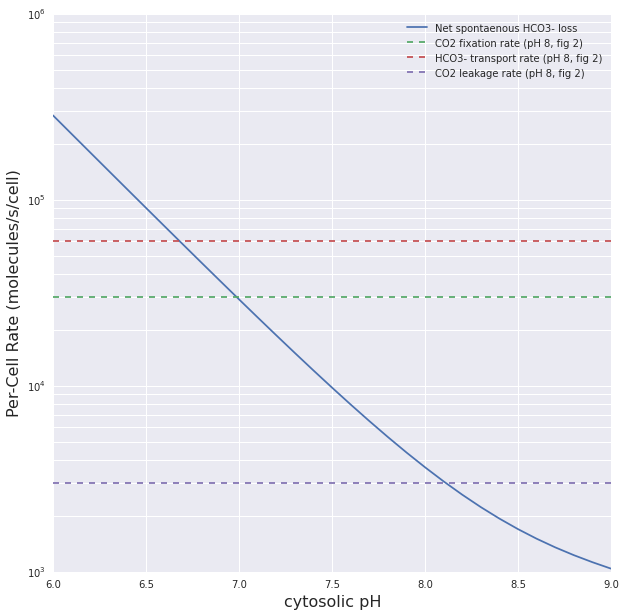

In [74]:
pylab.figure(figsize=(10,10))
pylab.semilogy(phs, bic_loss_rate, label='Net spontaenous HCO3- loss')
pylab.plot(phs, np.ones(phs.size)*fixation_rate, '--', label='CO2 fixation rate (pH 8, fig 2)')
pylab.plot(phs, np.ones(phs.size)*transport_rate, '--', label='HCO3- transport rate (pH 8, fig 2)')
pylab.plot(phs, np.ones(phs.size)*co2_leak_rate, '--', label='CO2 leakage rate (pH 8, fig 2)')

pylab.xlabel('cytosolic pH', fontsize=16)
pylab.ylabel('Per-Cell Rate (molecules/s/cell)', fontsize=16)
pylab.legend()
pylab.show()

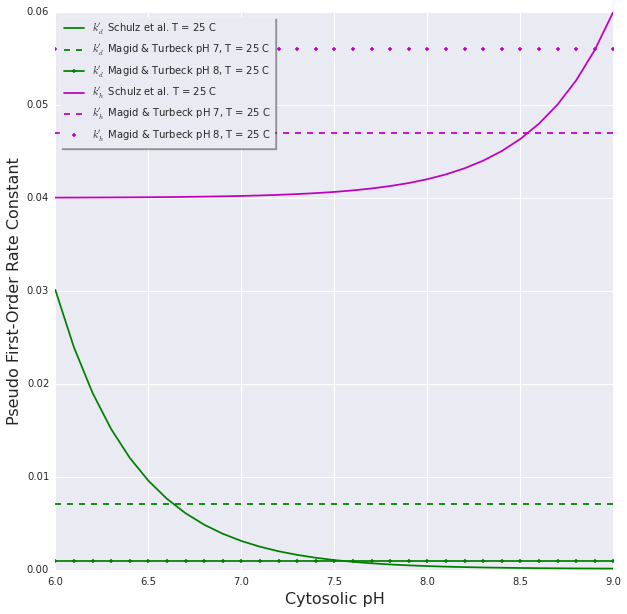

In [103]:
kd_mt_pH7 = 7.1e-3  # /s
kh_mt_pH7 = 47e-3   # /s
kd_mt_pH8 = 0.9e-3  # /s
kh_mt_pH8 = 56e-3   # /s


pylab.figure(figsize=(10,10))
pylab.plot(phs, kd, 'g-', label="$k'_d$ Schulz et al. T = 25 C")
pylab.plot(phs, kd_mt_pH7*np.ones(phs.size), 'g--', label="$k'_d$ Magid & Turbeck pH 7, T = 25 C")
pylab.plot(phs, kd_mt_pH8*np.ones(phs.size), 'g.-', label="$k'_d$ Magid & Turbeck pH 8, T = 25 C")

pylab.plot(phs, kh, 'm-', label="$k'_h$ Schulz et al. T = 25 C")
pylab.plot(phs, kh_mt_pH7*np.ones(phs.size), 'm--', label="$k'_h$ Magid & Turbeck pH 7, T = 25 C")
pylab.plot(phs, kh_mt_pH8*np.ones(phs.size), 'm.', label="$k'_h$ Magid & Turbeck pH 8, T = 25 C")


pylab.xlabel('Cytosolic pH', fontsize=16)
pylab.ylabel('Pseudo First-Order Rate Constant', fontsize=16)
pylab.legend(loc=2, frameon=True, shadow=True)
pylab.show()

In [93]:
neutral_idx = np.where(phs >= 6.99)[0][0]
print phs[neutral_idx]
print np.abs(kd[neutral_idx]-kd_mt)/kd[neutral_idx]
print np.abs(kh[neutral_idx]-kh_mt)/kh[neutral_idx]

7.0
1.29032258065
0.169154228856
